In [6]:
import warnings
import datetime
import itertools
import numpy as np
import scipy as sp
import cvxpy as cp
import pandas as pd
import yfinance as yf
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from functools import reduce
from kit import get_yf_ts, get_mcap

warnings.filterwarnings('ignore')

This notebook examines data for stock market indices for different markets (developed and emerging economies) their performance in the last 5 years and their constituents (where possible with data).

🇪🇺 <b>STOXX 50</b> is a stock index of companies in Eurozone countries. It is a market weighted index of the 50 stocks from 11 countries, representing some of the largest companies in Europe. The index itself as well as its derivatives (index futures and options) are among some of the most liquid products in Europe and the world. It's <b>price in euros</b> below:

[]

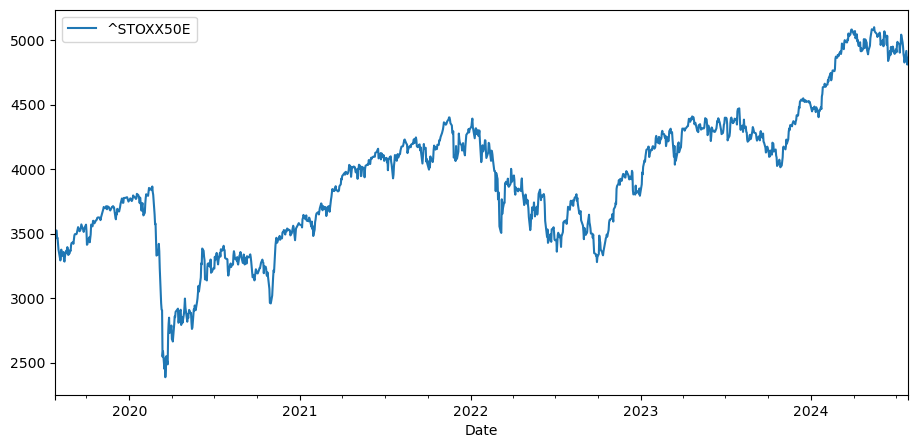

In [2]:
get_yf_ts('^STOXX50E', '5y', '1d').plot(figsize=(11,5))
plt.plot()

Short of data from Yahoo Finance, I am scraping the wikipedia page for its constituents, link for reference below:

In [3]:
stoxx50 = pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]

In [ ]:
stoxx50['MARKET_CAP_EUR'] = stoxx50['Ticker'].apply(lambda c: get_mcap(c, usd=False))
stoxx50['WEIGHT'] = stoxx50['MARKET_CAP_EUR'] / stoxx50['MARKET_CAP_EUR'].sum()

In [5]:
print("STOXX50 approximate market cap: EUR " + "{:,}".format(stoxx50['MARKET_CAP_EUR'].sum()))

STOXX50 approximate market cap: EUR 4,351,870,981,665.0


Below we observe the 15 largest constituents of STOXX50 as of today. Note, Yahoo Finance gives the total market cap and has no option for free floating cap (only public investor shares), so there might be some error in the ordering.

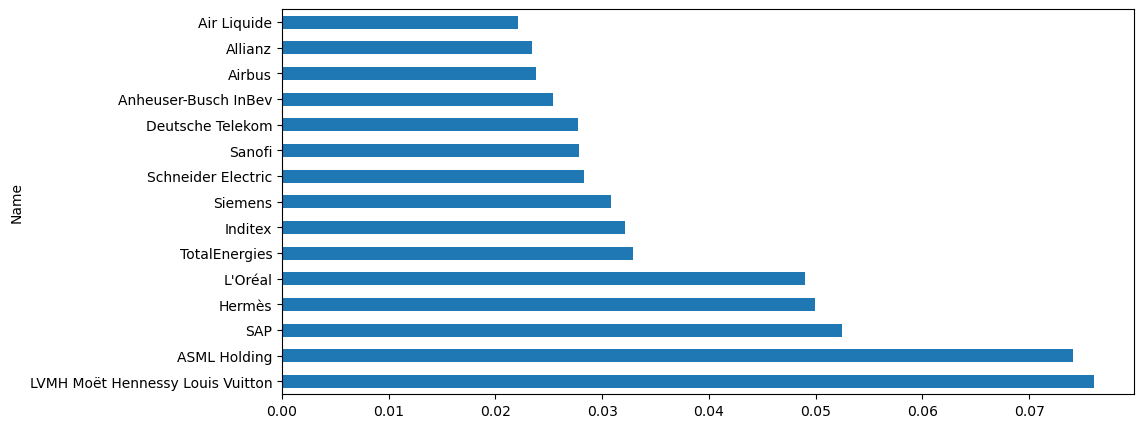

In [6]:
stoxx50.sort_values('WEIGHT', ascending=False).set_index('Name')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

We also observe the participation of companies (market cap) by country and industry:

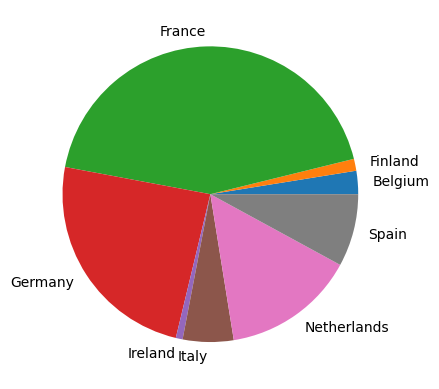

In [7]:
stoxx50.groupby('Registeredoffice')['WEIGHT'].sum().plot.pie(label='')
plt.show()

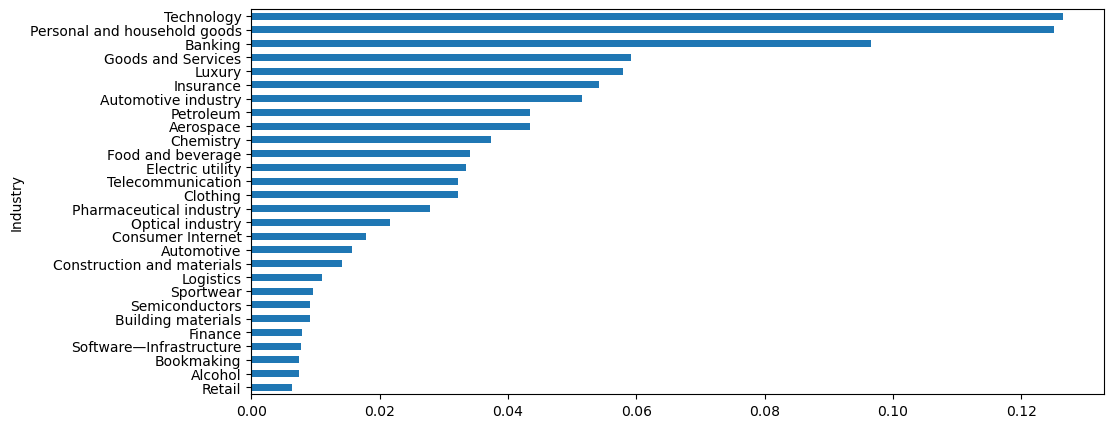

In [8]:
stoxx50.groupby('Industry')['WEIGHT'].sum().sort_values().plot.barh(figsize=(11,5))
plt.show()

🇺🇸 <b>Standard and Poor's 500 (S&P500)</b> tracks the 500 most liquid stocks listed on US exchanges, and represents 80% of the total market capitalization of US public companies a whopping $43 trillion as of start of 2024. Given its size, economists and analyst normally use its performance to track and project the direction of the US economy.

[]

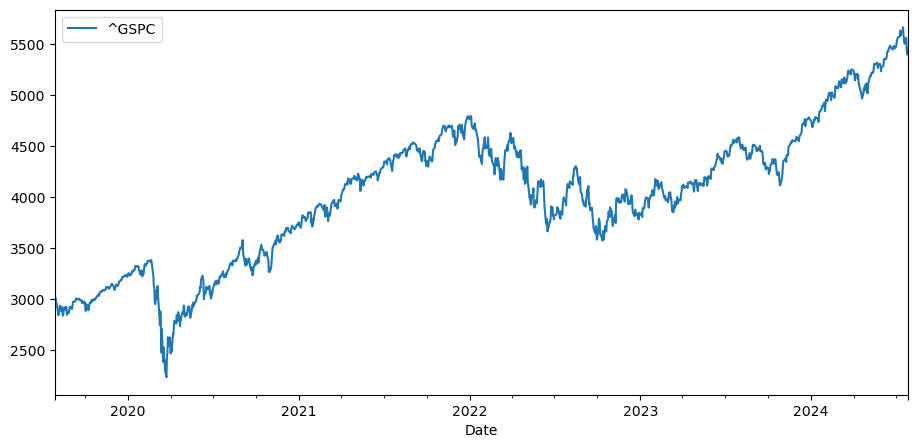

In [9]:
get_yf_ts('^GSPC', '5y', '1d').plot(figsize=(11,5))
plt.plot()

In [10]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [8]:
def try_except_mcap(ticker, usd=True): #For 500 constituents, more difficult to source every one from Yahoo Finance
    try:
        return get_mcap(ticker, usd=usd)
    except:
        return None

In [12]:
sp500['MARKET_CAP_USD'] = sp500['Symbol'].apply(lambda c: try_except_mcap(c, True))
sp500['WEIGHT'] = sp500['MARKET_CAP_USD'] / sp500['MARKET_CAP_USD'].sum()

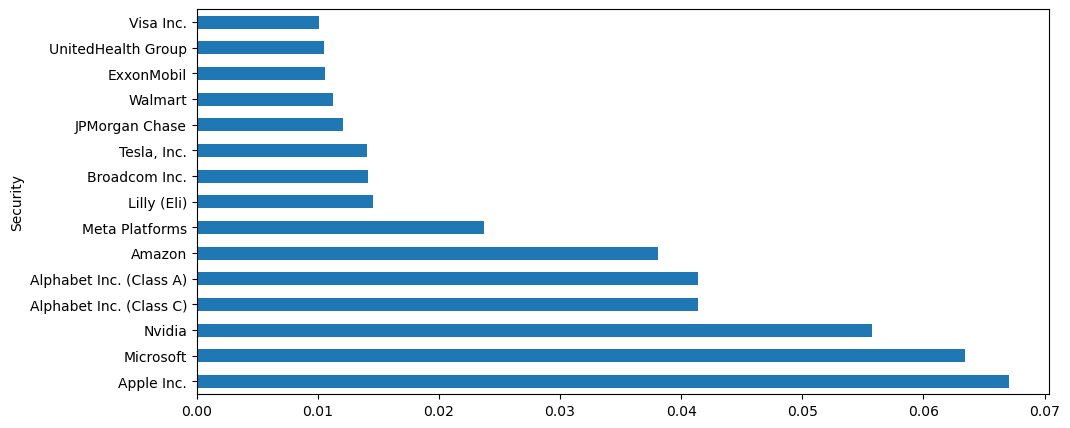

In [13]:
sp500.sort_values('WEIGHT', ascending=False).set_index('Security')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

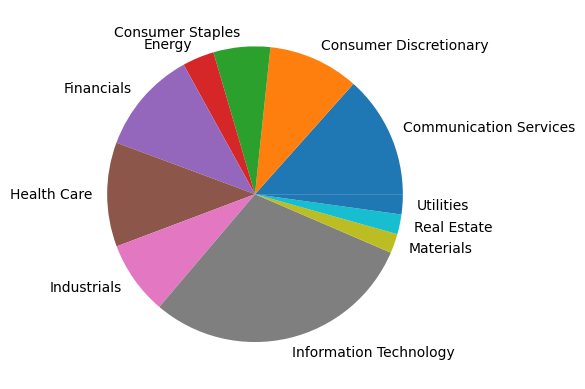

In [14]:
sp500.groupby('GICS Sector')['WEIGHT'].sum().plot.pie(label='')
plt.show()

🇬🇧 <b>Financial Times Stock Exchange 100 (FTSE 100) </b> is a stock index in the United Kingdom, representing the largest 100 UK companies by market capitalization. It is similarly market cap weighted (free floating) and has a market cap in excess of £2 trillion. Price in GBP below:

[]

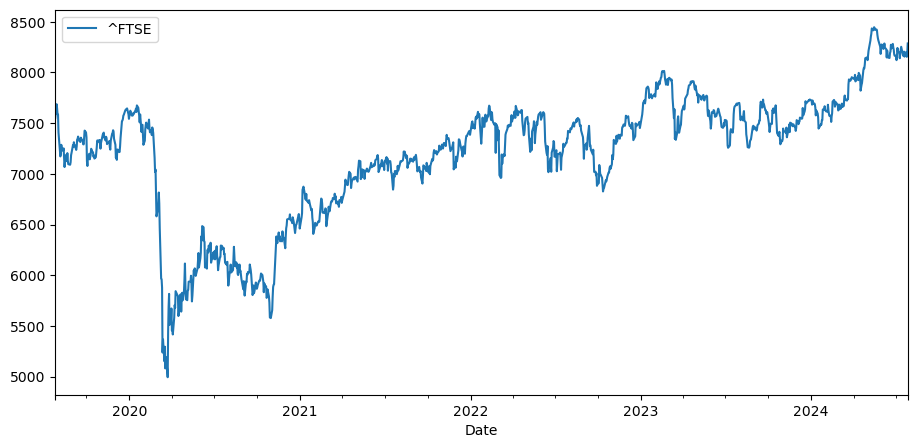

In [15]:
get_yf_ts('^FTSE', '5y', '1d').plot(figsize=(11,5))
plt.plot()

The code is quite repetitive and has small changes, as many tickers cannot be sourced via a unified API in Yahoo Finance.

In [16]:
def try_except_ftse_mcap(ticker):
    try:
        return yf.Ticker(ticker + '.L').balancesheet.loc['Total Capitalization'].iloc[0]
    except:
        return None

In [17]:
ftse = pd.read_html('https://en.wikipedia.org/wiki/FTSE_100_Index')[4]
ftse['MARKET_CAP_GBP'] = ftse['Ticker'].apply(try_except_ftse_mcap)
ftse['WEIGHT'] = ftse['MARKET_CAP_GBP'] / ftse['MARKET_CAP_GBP'].sum()

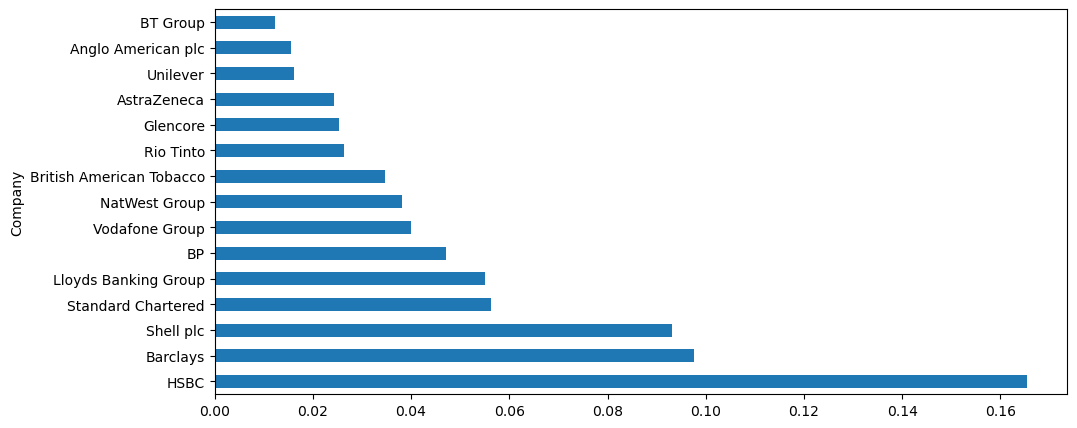

In [18]:
ftse.sort_values('WEIGHT', ascending=False).set_index('Company')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

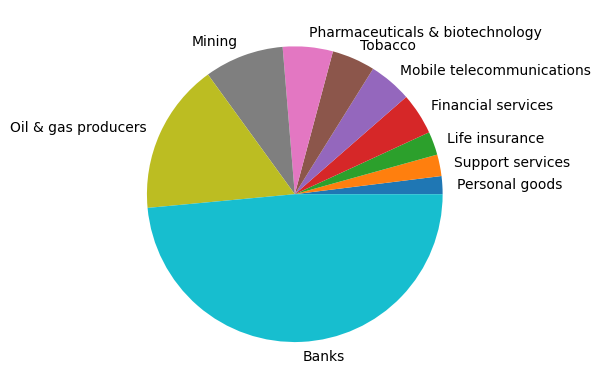

In [19]:
ftse.groupby('FTSE industry classification benchmark sector[25]')['WEIGHT'].sum().sort_values().tail(10).plot.pie(label='')
plt.show()

🇯🇵 <b>Nikkei 225</b> is a Japanese stock index, tracking the 225 publicly listed companies with high market capitalization. It is a price-weighted index in JP¥ and has companies from many different industries. Price in Japanese yen below:

[]

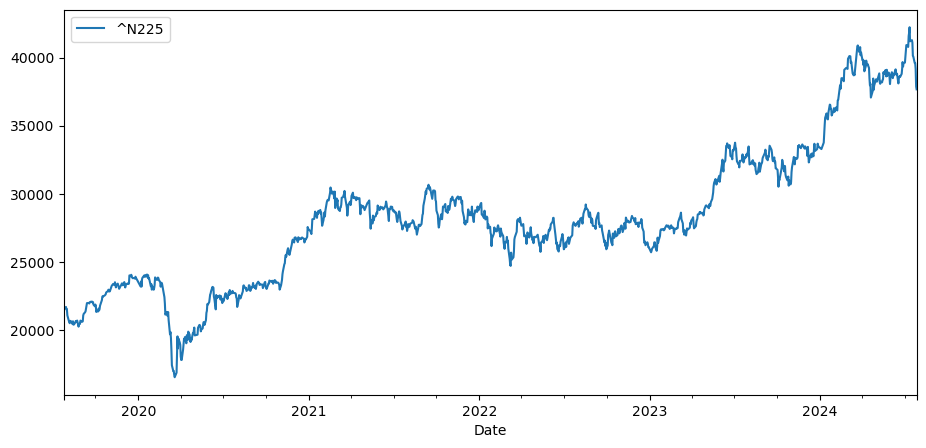

In [20]:
get_yf_ts('^N225', '5y', '1d').plot(figsize=(11,5))
plt.plot()

🇯🇵 <b>TOPIX</b> is a Japanese stock index, tracking a wider range (nearly 2000) publicly listed companies with highest market capitalization. In contrast to Nikkei 225, it is market cap weighted and also in JP¥.

[]

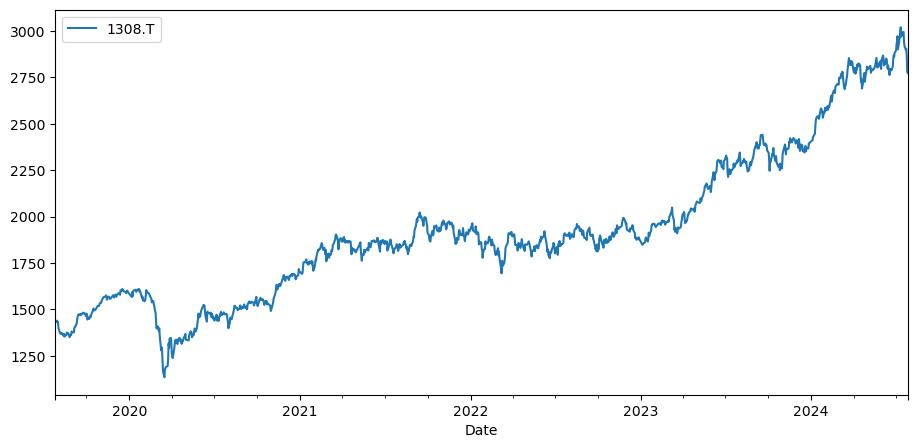

In [9]:
get_yf_ts('1308.T', '5y', '1d').plot(figsize=(11,5))
plt.plot()

🇫🇷 <b>Cotation Assistée en Continu (CAC 40)</b> is a stock market index representing a capitalization-weighted measure of the 40 most significant publicly listed companies in France. Price in EUR below:

[]

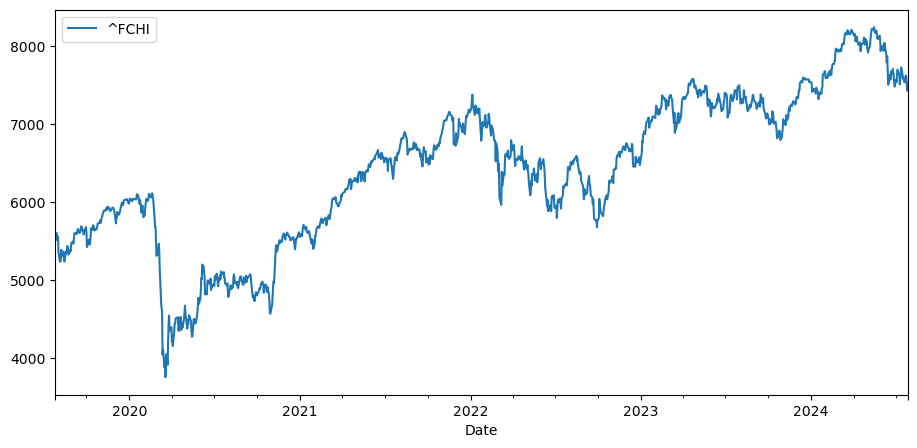

In [10]:
get_yf_ts('^FCHI', '5y', '1d').plot(figsize=(11,5))
plt.plot()

In [11]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]

In [13]:
cac40['MARKET_CAP_EUR'] = cac40['Ticker'].apply(lambda c: get_mcap(c, usd=False))
cac40['WEIGHT'] = cac40['MARKET_CAP_EUR'] / cac40['MARKET_CAP_EUR'].sum()

In [16]:
print("CAC 40 approximate market cap: EUR " + "{:,}".format(cac40['MARKET_CAP_EUR'].sum()))

CAC 40 approximate market cap: EUR 2,380,577,578,240


We observe how the largest constituents of the CAC 40 overlap with STOXX 50.

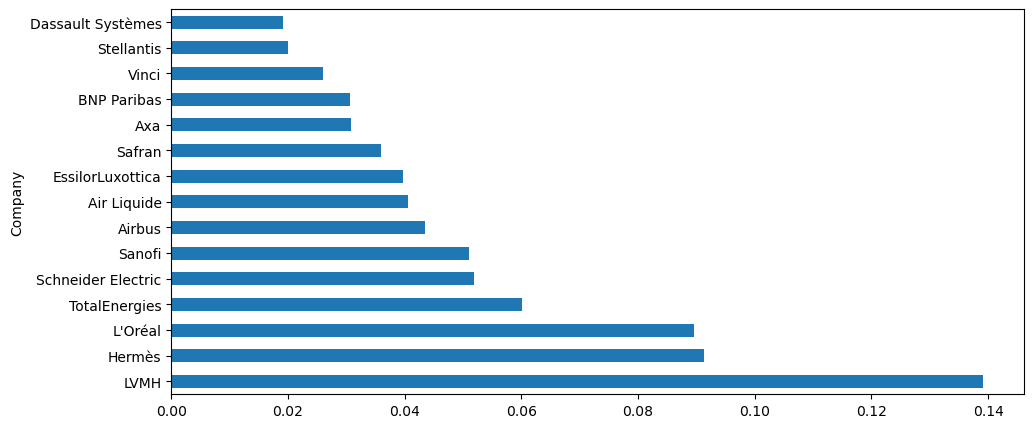

In [19]:
cac40.sort_values('WEIGHT', ascending=False).set_index('Company')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

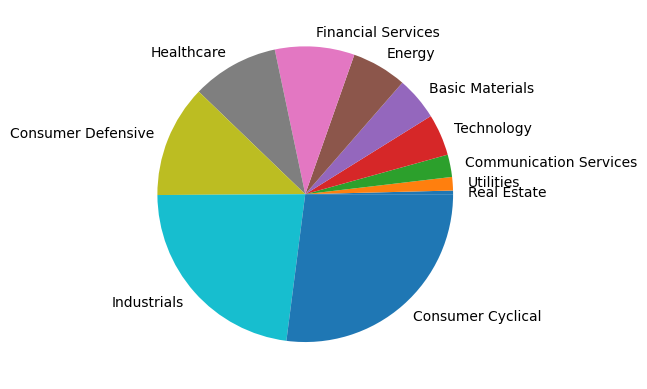

In [25]:
cac40.groupby('Sector')['WEIGHT'].sum().sort_values().plot.pie(label='')
plt.show()

🇰🇷 <b>Korea Composite Stock Price Index (KOSPI)</b> is the representative stock market index of South Korea, benchmarking all publicly traded companies in South Korea. It is calculated based on market capitalization.

[]

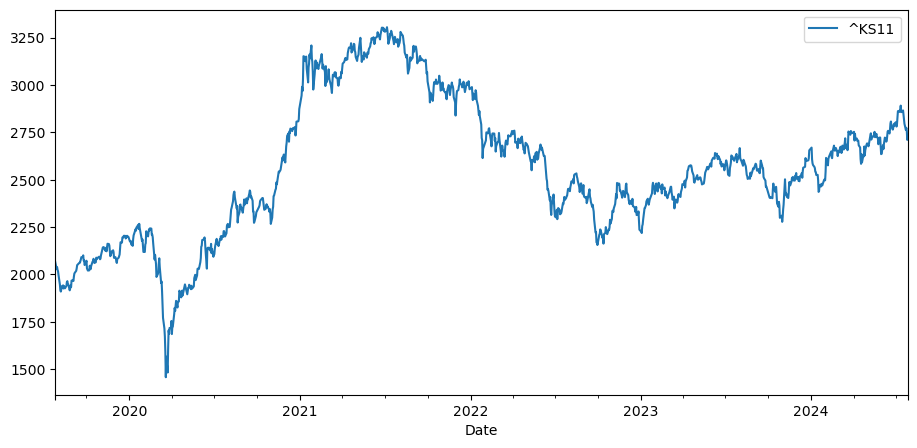

In [26]:
get_yf_ts('^KS11', '5y', '1d').plot(figsize=(11,5))
plt.plot()

In [51]:
kospi = pd.read_html('https://en.wikipedia.org/wiki/KOSPI')[5]
kospi[kospi.columns[0]].to_frame().T

,0,1,2,3,4,5,6,7,8,9
Top 10 stocks by market capitalization are:,Samsung Electronics,SK Hynix,LG Energy Solution,Samsung Biologics,Hyundai Motor Company,Kia,Celltrion,POSCO,LG Chem,Naver Corporation


🌎 <b>MSCI World</b> is a global stock market index that tracks the performance of around 1500 large and mid-cap companies across 23 developed countries. It is maintained by MSCI, formerly Morgan Stanley Capital International, and is used as a common benchmark for global stock funds intended to represent a broad cross-section of global markets. An USD standardized price below:

[]

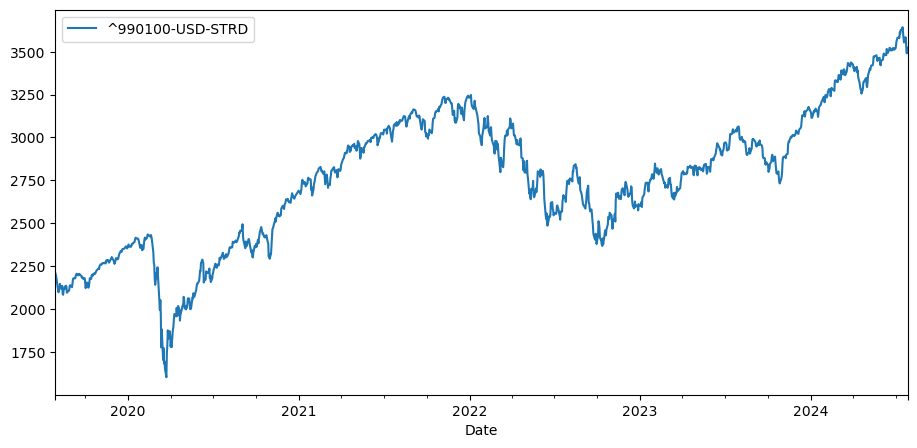

In [40]:
get_yf_ts('^990100-USD-STRD', '5y', '1d').plot(figsize=(11,5))
plt.plot()

Moving towards <b>emerging economies</b>, many index providers such as MSCI and S&P have indices tracking companies in emerging markets, however, I will explore a few native indices in China, India, Brazil and Russia.

🇨🇳 <b>CSI 300</b> Index is a stock index of Shanghai Stock Exchange and the Shenzhen Stock Exchange. It is representing the top 300 stocks with highest market capitalization in China. The index is compiled by the China Securities Index Company, Ltd. It's price below in CNY.

[]

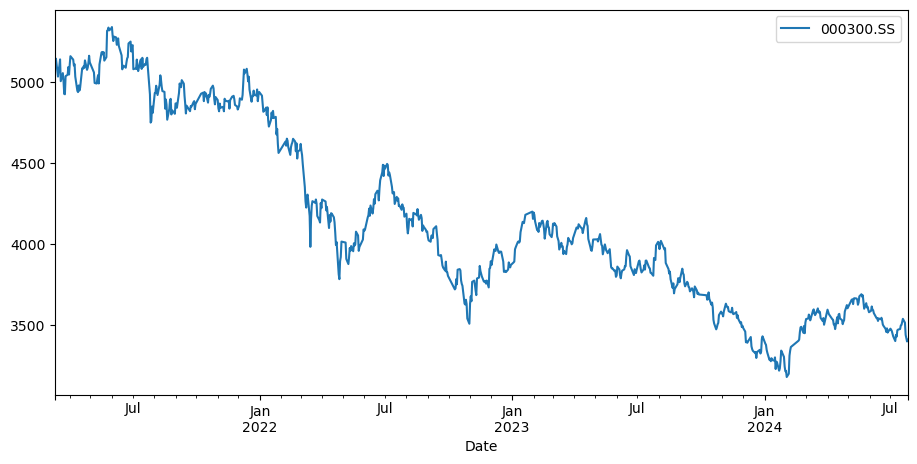

In [81]:
get_yf_ts('000300.SS', '5y', '1d').plot(figsize=(11,5))
plt.plot()

In [69]:
csi300 = pd.read_html('https://en.wikipedia.org/wiki/CSI_300_Index')[3]
csi300['WEIGHT'] = csi300['Weighting (%)'] / 100

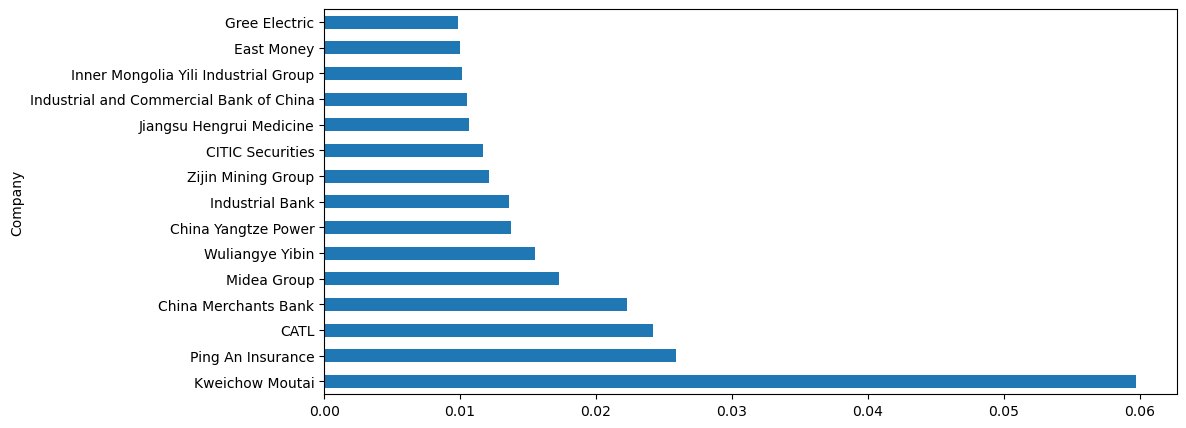

In [70]:
csi300.sort_values('Weighting (%)', ascending=False).set_index('Company')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()

In [73]:
csi300.groupby('Exchange')['WEIGHT'].sum().to_frame().T

Exchange,Shanghai,Shenzhen
WEIGHT,0.64781,0.35217


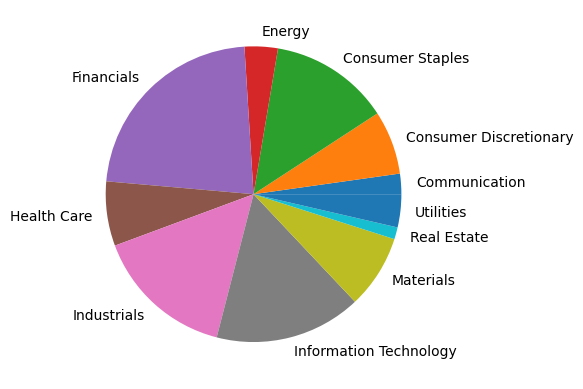

In [77]:
csi300.groupby('Segment')['WEIGHT'].sum().plot.pie(label='')
plt.show()

🇮🇳 <b>NIFTY 50</b> is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the Mumbai -  National Stock Exchange. Price in Indian rupee below:

[]

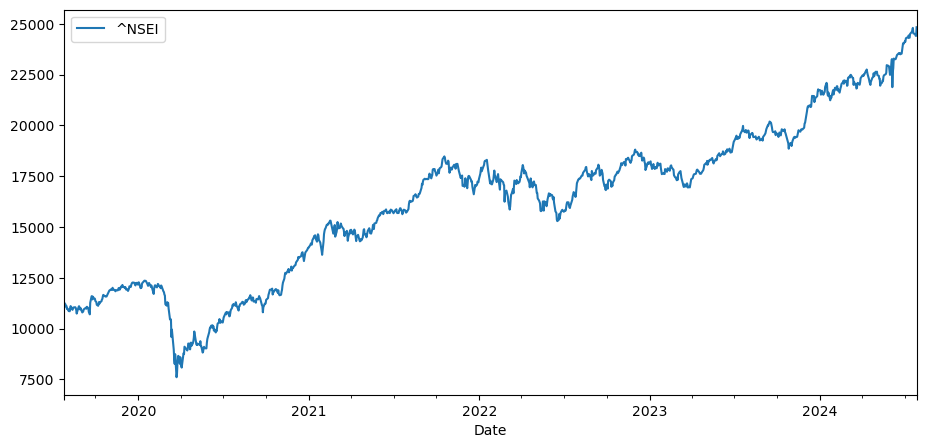

In [82]:
get_yf_ts('^NSEI', '5y', '1d').plot(figsize=(11,5))
plt.plot()

🇧🇷 <b>Bovespa</b> Index, best known as <b>Ibovespa</b> is the benchmark index of about 86 stocks traded on the B3 (Brasil Bolsa Balcão), accounting for the majority of trading and market capitalization in the Brazilian stock market. It is a weighted measurement index. Price in Brazilian reals below:

[]

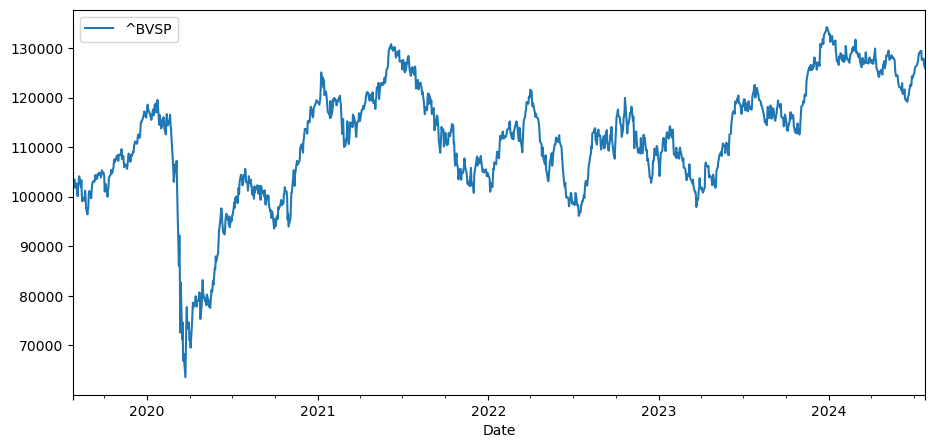

In [83]:
get_yf_ts('^BVSP', '5y', '1d').plot(figsize=(11,5))
plt.plot()

🇷🇺 <b>MOEX</b> Russia Index, formerly the MICEX Index, is the main ruble-denominated benchmark of the Russian stock market.

[]

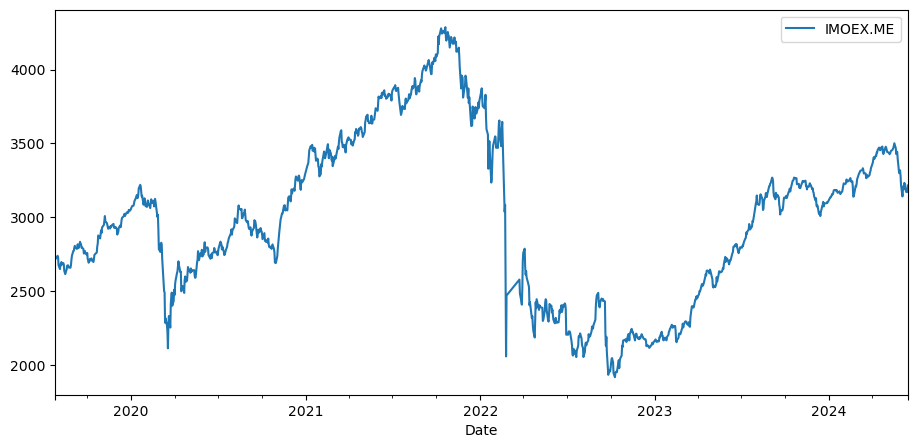

In [84]:
get_yf_ts('IMOEX.ME', '5y', '1d').plot(figsize=(11,5))
plt.plot()